In [1]:
# !pip install missingno
import pandas as pd
import numpy as np
import missingno as mso
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer

import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/horse-dataset/horse.csv')
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


# 1- Analyse des donnees manquantes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

<Axes: >

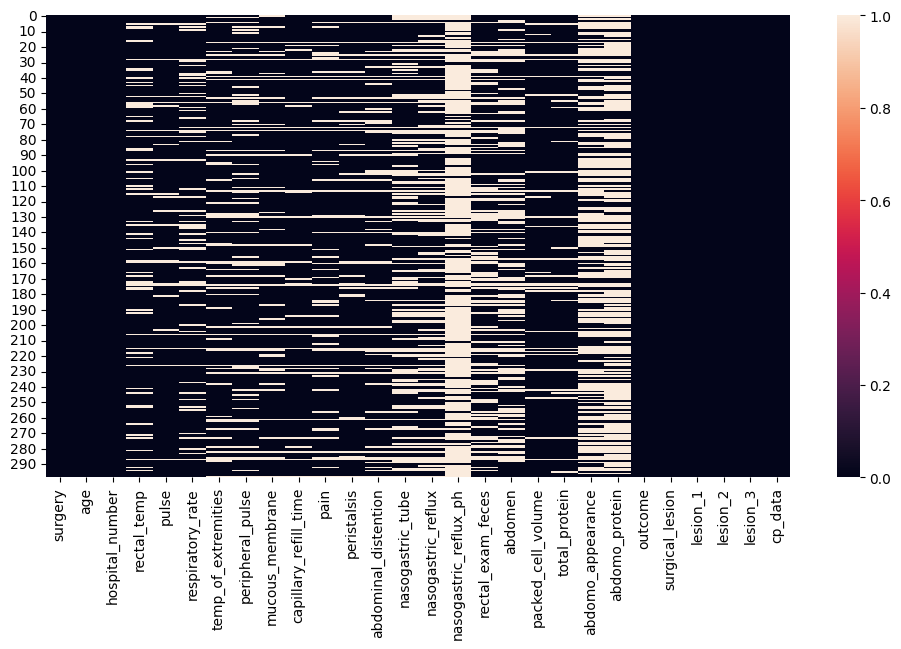

In [4]:
# visualisation du taux de valeurs manquantes par variables
plt.figure(figsize=(12,6))
sns.heatmap(df.isna())

<Axes: >

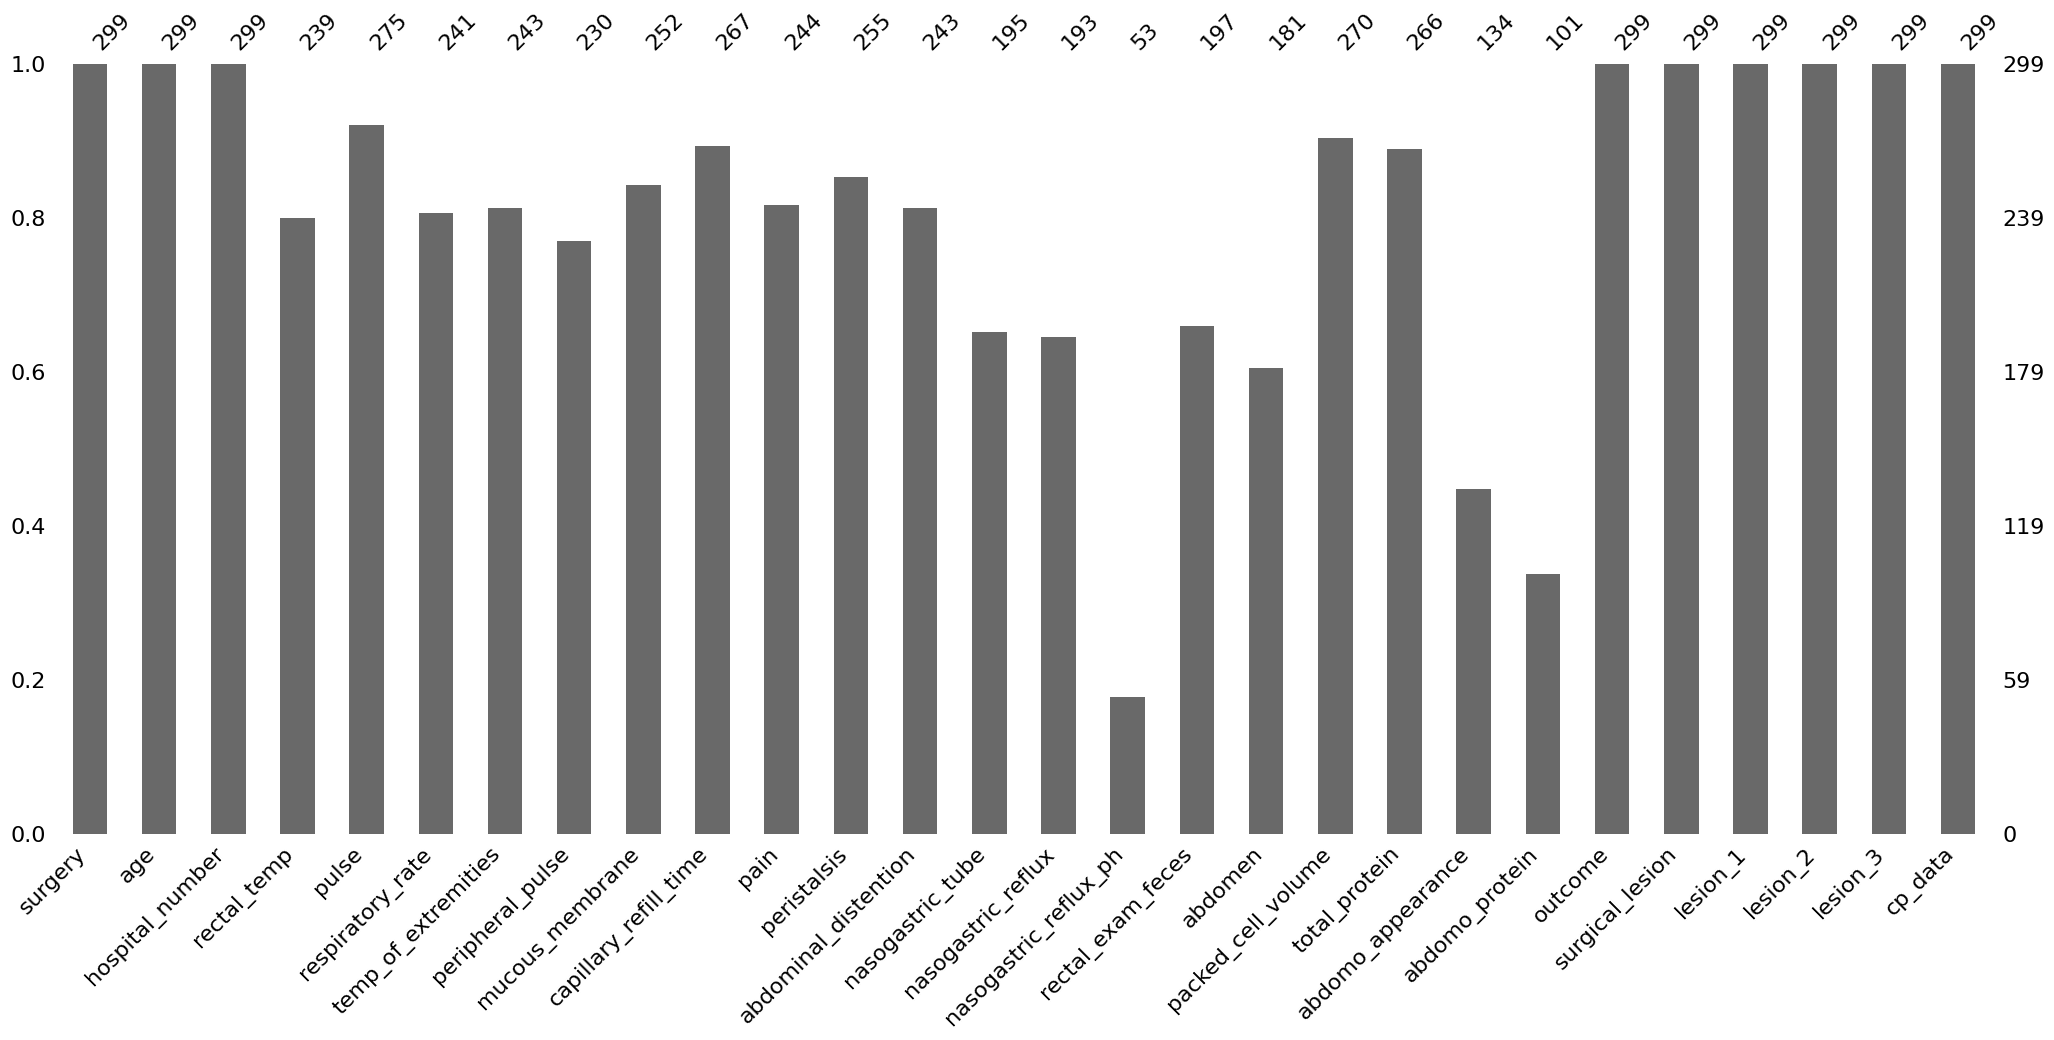

In [5]:
mso.bar(df)

<Axes: >

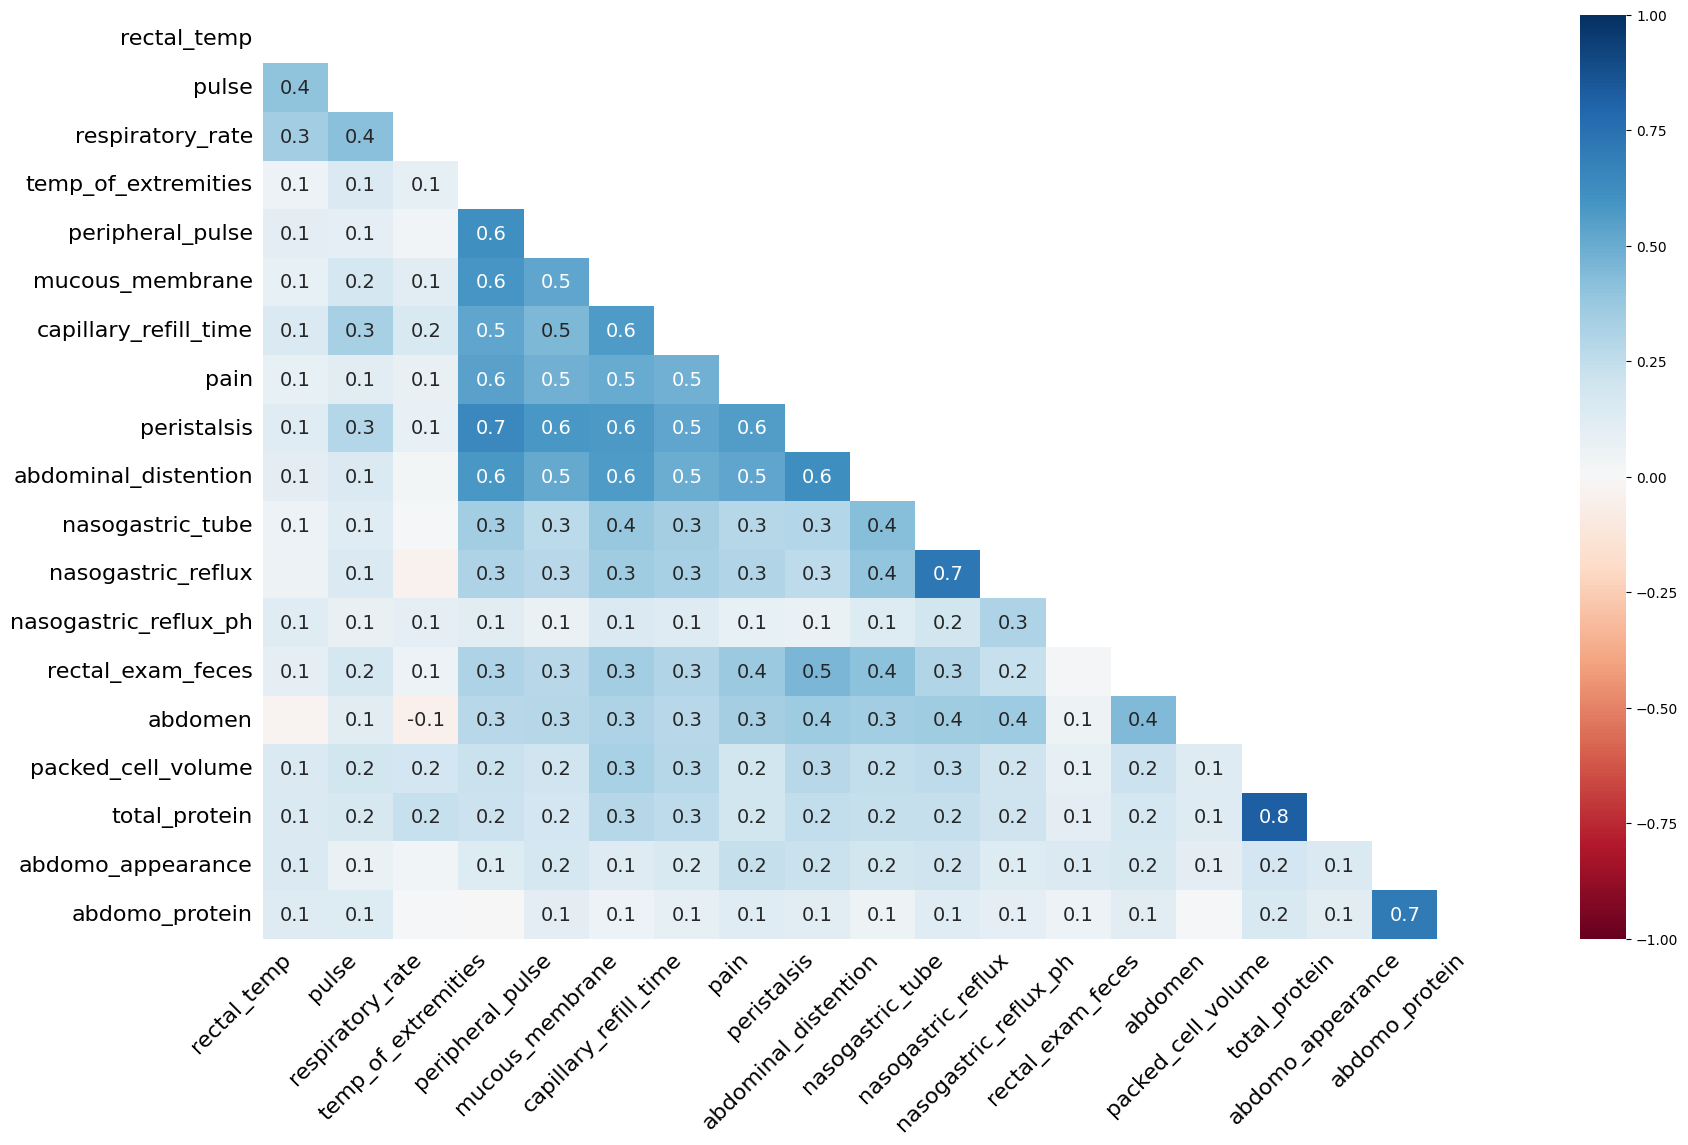

In [6]:
# correlation entre les valeurs manquantes
mso.heatmap(df)

In [7]:
pr=(df.isna().sum()/len(df))*100
df=df[df.columns[pr<30.0]]
pr.sort_values()

surgery                   0.000000
lesion_2                  0.000000
lesion_1                  0.000000
surgical_lesion           0.000000
outcome                   0.000000
lesion_3                  0.000000
cp_data                   0.000000
age                       0.000000
hospital_number           0.000000
pulse                     8.026756
packed_cell_volume        9.698997
capillary_refill_time    10.702341
total_protein            11.036789
peristalsis              14.715719
mucous_membrane          15.719064
pain                     18.394649
abdominal_distention     18.729097
temp_of_extremities      18.729097
respiratory_rate         19.397993
rectal_temp              20.066890
peripheral_pulse         23.076923
rectal_exam_feces        34.113712
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
abdomen                  39.464883
abdomo_appearance        55.183946
abdomo_protein           66.220736
nasogastric_reflux_ph    82.274247
dtype: float64

<Axes: >

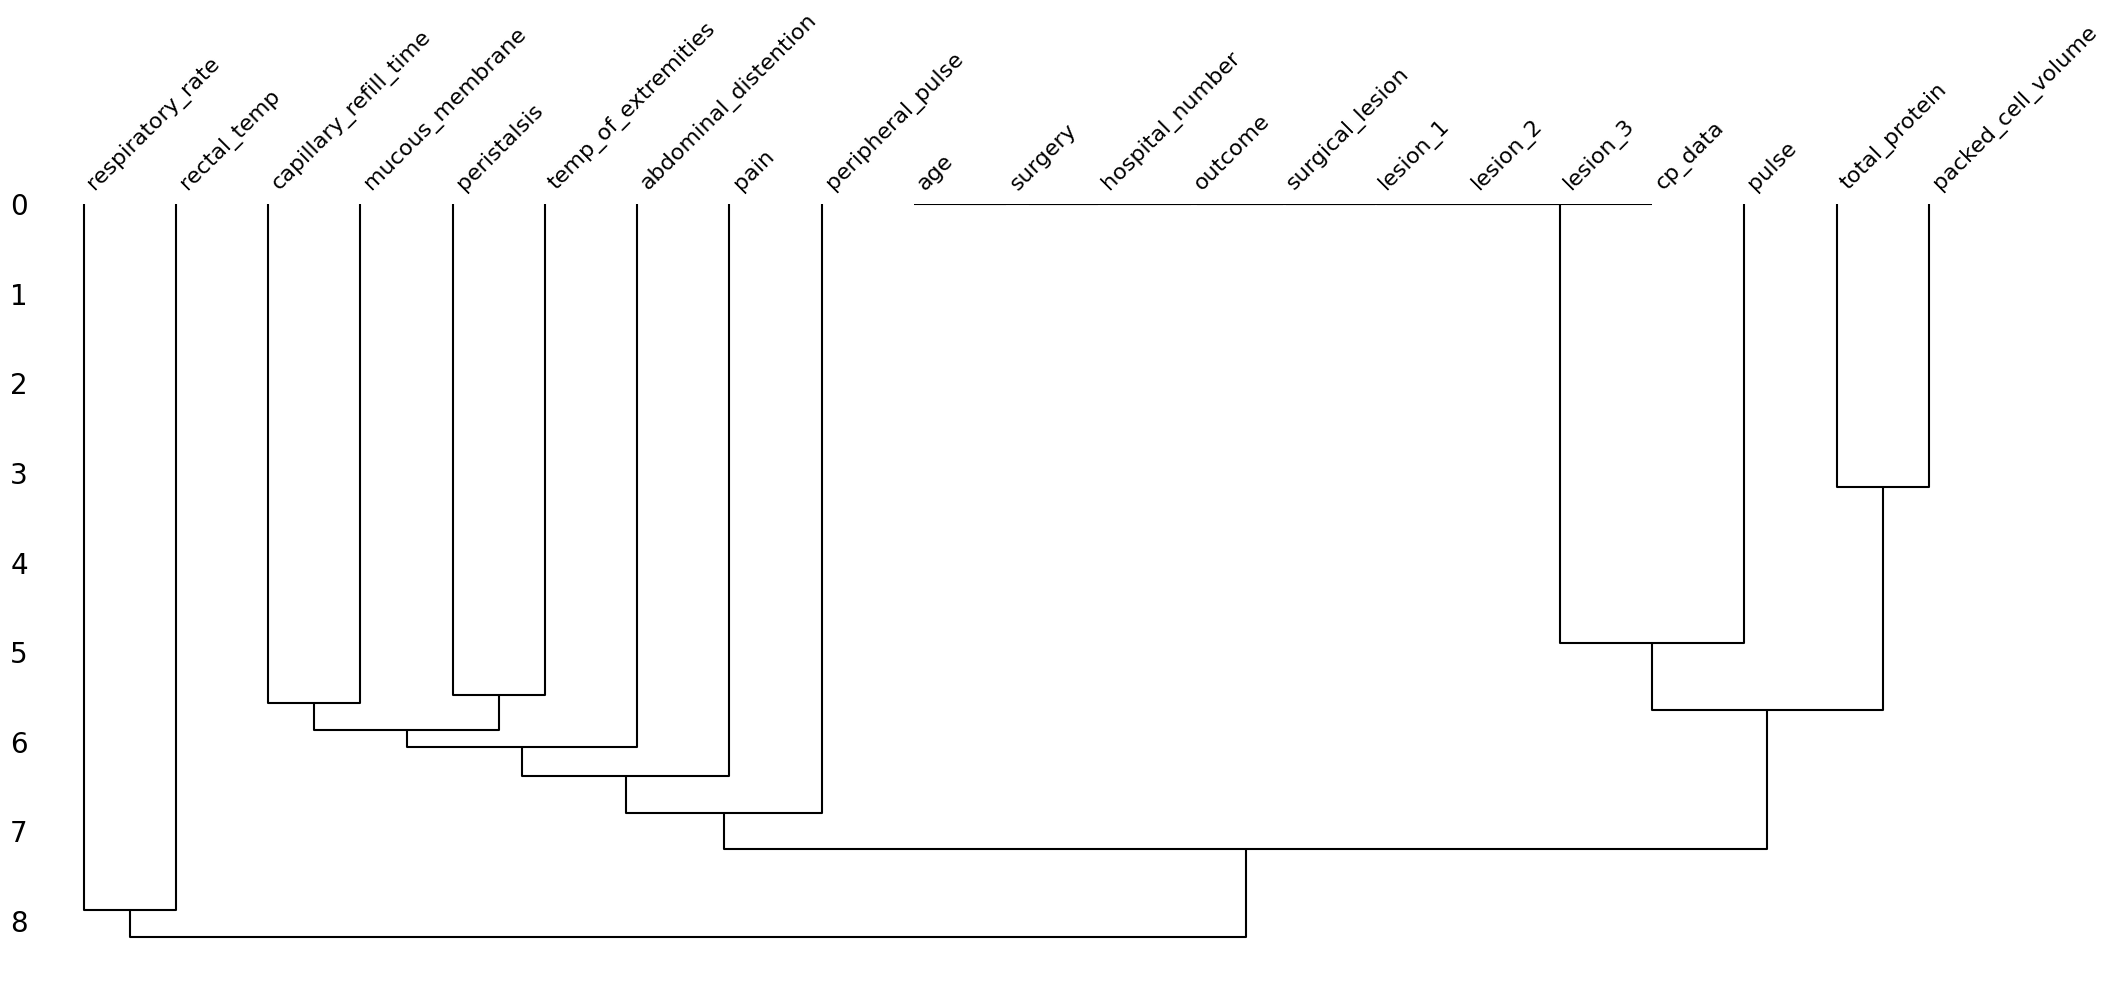

In [8]:
# analyse graphique des correlations entre les valeurs manquantes
mso.dendrogram(df)

# 2-Traitement des donnees manquantes

## 2-1 imputation par la moyenne la mediane et le mode

### 2-1-1 par la mediane

In [9]:
display(df[['total_protein']])
display(df.info())

,total_protein
0,8.4
1,85.0
2,6.7
3,7.2
4,7.4
...,...
294,65.0
295,NaN
296,6.8
297,6.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  packed_cell_volume     270 non-null    float64
 14  total_protein          266 non-null    float64
 15  outcom

None

In [10]:
imputer_mediane=SimpleImputer(strategy='median')
df['total_protein_impute']=imputer_mediane.fit_transform(df[['total_protein']])
df.isna().mean()

surgery                  0.000000
age                      0.000000
hospital_number          0.000000
rectal_temp              0.200669
pulse                    0.080268
respiratory_rate         0.193980
temp_of_extremities      0.187291
peripheral_pulse         0.230769
mucous_membrane          0.157191
capillary_refill_time    0.107023
pain                     0.183946
peristalsis              0.147157
abdominal_distention     0.187291
packed_cell_volume       0.096990
total_protein            0.110368
outcome                  0.000000
surgical_lesion          0.000000
lesion_1                 0.000000
lesion_2                 0.000000
lesion_3                 0.000000
cp_data                  0.000000
total_protein_impute     0.000000
dtype: float64

### 2-1-2-par la moyenne

In [11]:
imputer_mean=SimpleImputer(strategy='mean')
df['packed_cell_volume_impute']=imputer_mean.fit_transform(df[['packed_cell_volume']])
df.isna().mean()

surgery                      0.000000
age                          0.000000
hospital_number              0.000000
rectal_temp                  0.200669
pulse                        0.080268
respiratory_rate             0.193980
temp_of_extremities          0.187291
peripheral_pulse             0.230769
mucous_membrane              0.157191
capillary_refill_time        0.107023
pain                         0.183946
peristalsis                  0.147157
abdominal_distention         0.187291
packed_cell_volume           0.096990
total_protein                0.110368
outcome                      0.000000
surgical_lesion              0.000000
lesion_1                     0.000000
lesion_2                     0.000000
lesion_3                     0.000000
cp_data                      0.000000
total_protein_impute         0.000000
packed_cell_volume_impute    0.000000
dtype: float64

### 2-1-3 par le mode

In [12]:
# imputer_mod=SimpleImputer(strategy='most_frequent')
df['peripheral_pulse_impute']=df['peripheral_pulse'].fillna(df['peripheral_pulse'].mode())
df.isna().mean()

surgery                      0.000000
age                          0.000000
hospital_number              0.000000
rectal_temp                  0.200669
pulse                        0.080268
respiratory_rate             0.193980
temp_of_extremities          0.187291
peripheral_pulse             0.230769
mucous_membrane              0.157191
capillary_refill_time        0.107023
pain                         0.183946
peristalsis                  0.147157
abdominal_distention         0.187291
packed_cell_volume           0.096990
total_protein                0.110368
outcome                      0.000000
surgical_lesion              0.000000
lesion_1                     0.000000
lesion_2                     0.000000
lesion_3                     0.000000
cp_data                      0.000000
total_protein_impute         0.000000
packed_cell_volume_impute    0.000000
peripheral_pulse_impute      0.230769
dtype: float64

In [13]:
df['peripheral_pulse'].unique()

array(['reduced', nan, 'normal', 'absent', 'increased'], dtype=object)

# 3-KNN imputer: adapte au MAR et MCAR

In [14]:
imputer=KNNImputer(n_neighbors=3)
df[['rectal_temp_knn','packed_cell_volume_knn','total_protein_knn']]=imputer.fit_transform(df[['rectal_temp','packed_cell_volume','total_protein']])
df.isna().mean()

surgery                      0.000000
age                          0.000000
hospital_number              0.000000
rectal_temp                  0.200669
pulse                        0.080268
respiratory_rate             0.193980
temp_of_extremities          0.187291
peripheral_pulse             0.230769
mucous_membrane              0.157191
capillary_refill_time        0.107023
pain                         0.183946
peristalsis                  0.147157
abdominal_distention         0.187291
packed_cell_volume           0.096990
total_protein                0.110368
outcome                      0.000000
surgical_lesion              0.000000
lesion_1                     0.000000
lesion_2                     0.000000
lesion_3                     0.000000
cp_data                      0.000000
total_protein_impute         0.000000
packed_cell_volume_impute    0.000000
peripheral_pulse_impute      0.230769
rectal_temp_knn              0.000000
packed_cell_volume_knn       0.000000
total_protei

In [15]:
# imputer2=KNNImputer()
# df['abdominal_distention_knn']=imputer2.fit_transform(df[['abdominal_distention']])

# 4-Iterative imputer: pour le MNAR

In [16]:
imputer_iterative=IterativeImputer(max_iter=10, random_state=0, sample_posterior=True)